# ZINDI HACKATON

In [1]:
# importing the neccesarry packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the datasets
df_train = pd.read_csv("Housing_dataset_train.csv")
df_test = pd.read_csv("Housing_dataset_test.csv")
samplesubmission = pd.read_csv("Sample_submission.csv")

In [4]:
#display the first 5 rows of the test datasets
df_train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


## DATA CLEANING

In [5]:
df_train.value_counts().sum()

5689

In [6]:
df_train.shape

(14000, 7)

### Checking for any missing values in the dataset and handle them accordingly

In [7]:
(df_train.isna().sum()/len(df_train)) * 100

ID                0.000000
loc              12.950000
title            12.300000
bedroom          12.850000
bathroom         12.892857
parking_space    12.935714
price             0.000000
dtype: float64

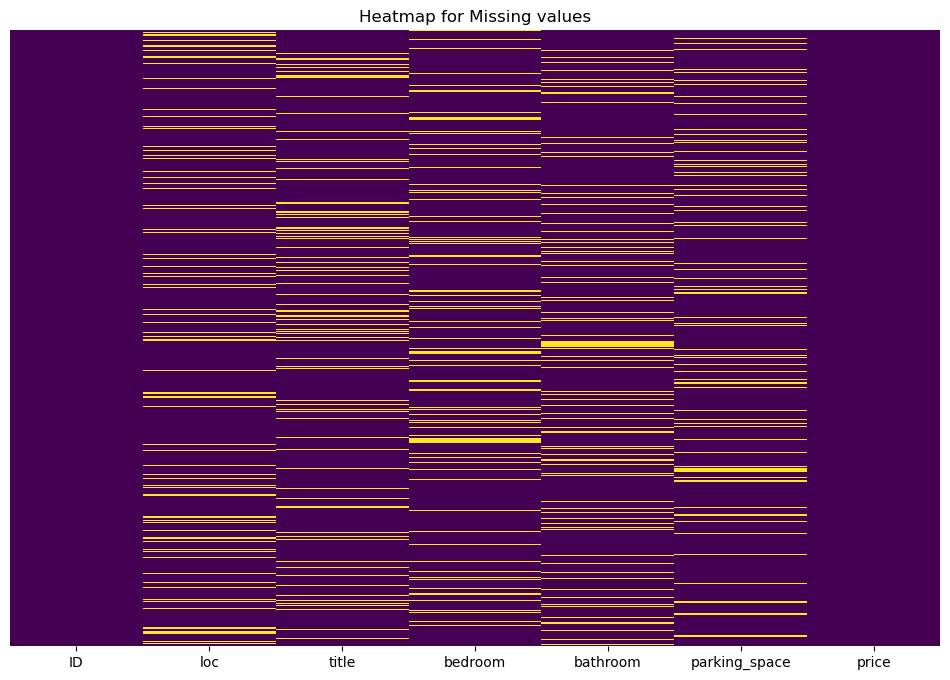

In [8]:
#using heatmap to visualize the missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Heatmap for Missing values")
plt.show()

In [9]:
df_train = df_train.reset_index(drop=True)
df_train

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718


In [13]:
#fill the missing values of the bathroom, bedroom &parking space using the mean
df_train.parking_space = df_train.parking_space.fillna(df_train.parking_space.mean())
df_train.bedroom = df_train.bedroom.fillna(df_train.bedroom.mean())
df_train.bathroom = df_train.bathroom.fillna(df_train.bathroom.mean())


In [14]:
df_train = df_train.dropna(subset=['loc', 'title'])

In [15]:
print("missing values:", df_train.isnull().sum())

missing values: ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64


In [16]:
df_train

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.000000,2.0,1.000000,1149999.565
1,2748,Ondo,Apartment,4.308171,2.0,4.000000,1672416.689
3,2224,Anambra,Detached duplex,5.000000,2.0,4.000000,2410306.756
4,10300,Kogi,Terrace duplex,4.308171,5.0,6.000000,2600700.898
5,1733,Borno,Mansion,4.308171,1.0,3.000000,1341750.867
...,...,...,...,...,...,...,...
13994,10477,Taraba,Detached duplex,8.000000,1.0,6.000000,2837199.086
13995,6175,Edo,Bungalow,4.308171,7.0,3.169825,2367927.861
13996,9704,Kaduna,Apartment,4.308171,7.0,5.000000,2228516.471
13997,11190,Plateau,Bungalow,8.000000,6.0,5.000000,2406812.693


In [17]:
df_train.describe()

,ID,bedroom,bathroom,parking_space,price
count,12278.000000,12278.000000,12278.000000,12278.000000,1.227800e+04
mean,4863.809822,4.302403,3.133038,3.169882,2.133243e+06
std,3824.766813,2.262956,1.881390,1.481463,1.082333e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1667.000000,3.000000,2.000000,2.000000,1.388516e+06
50%,3529.500000,4.308171,3.000000,3.169825,1.888690e+06
75%,8018.000000,5.000000,4.000000,4.000000,2.580634e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


## EDA

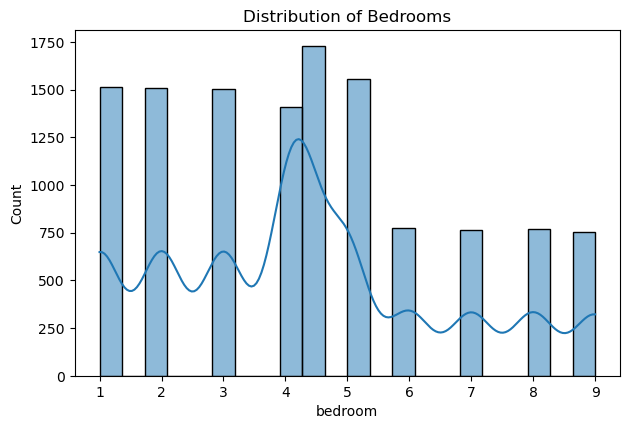

In [18]:
# Distribution plots for numeric features
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(df_train['bedroom'], kde=True, bins=22)
plt.title('Distribution of Bedrooms')

plt.tight_layout()
plt.show()

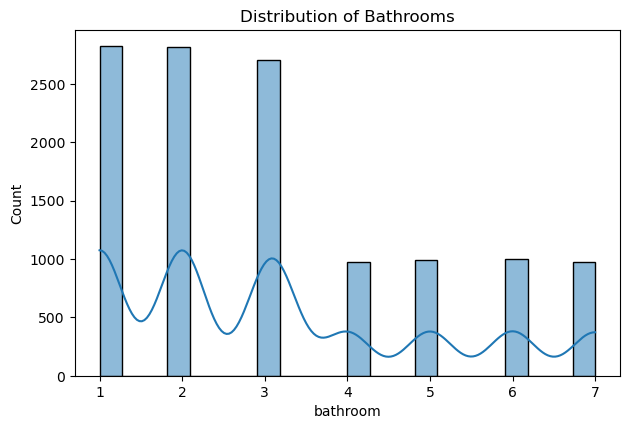

In [19]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,2)
sns.histplot(df_train['bathroom'], kde=True, bins=22)
plt.title('Distribution of Bathrooms')

plt.tight_layout()
plt.show()

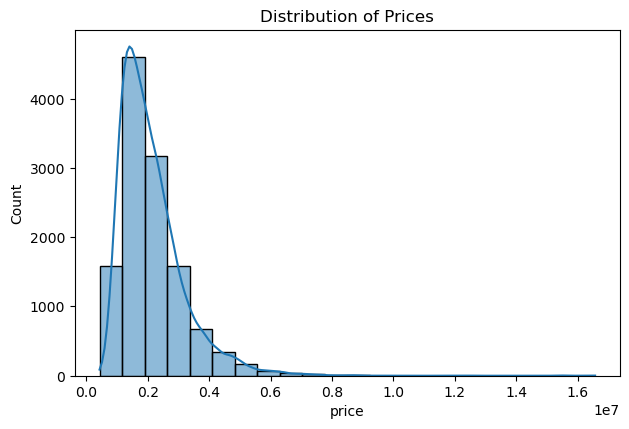

In [20]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,3)
sns.histplot(df_train['price'], kde=True, bins=22)
plt.title('Distribution of Prices')

plt.tight_layout()
plt.show()

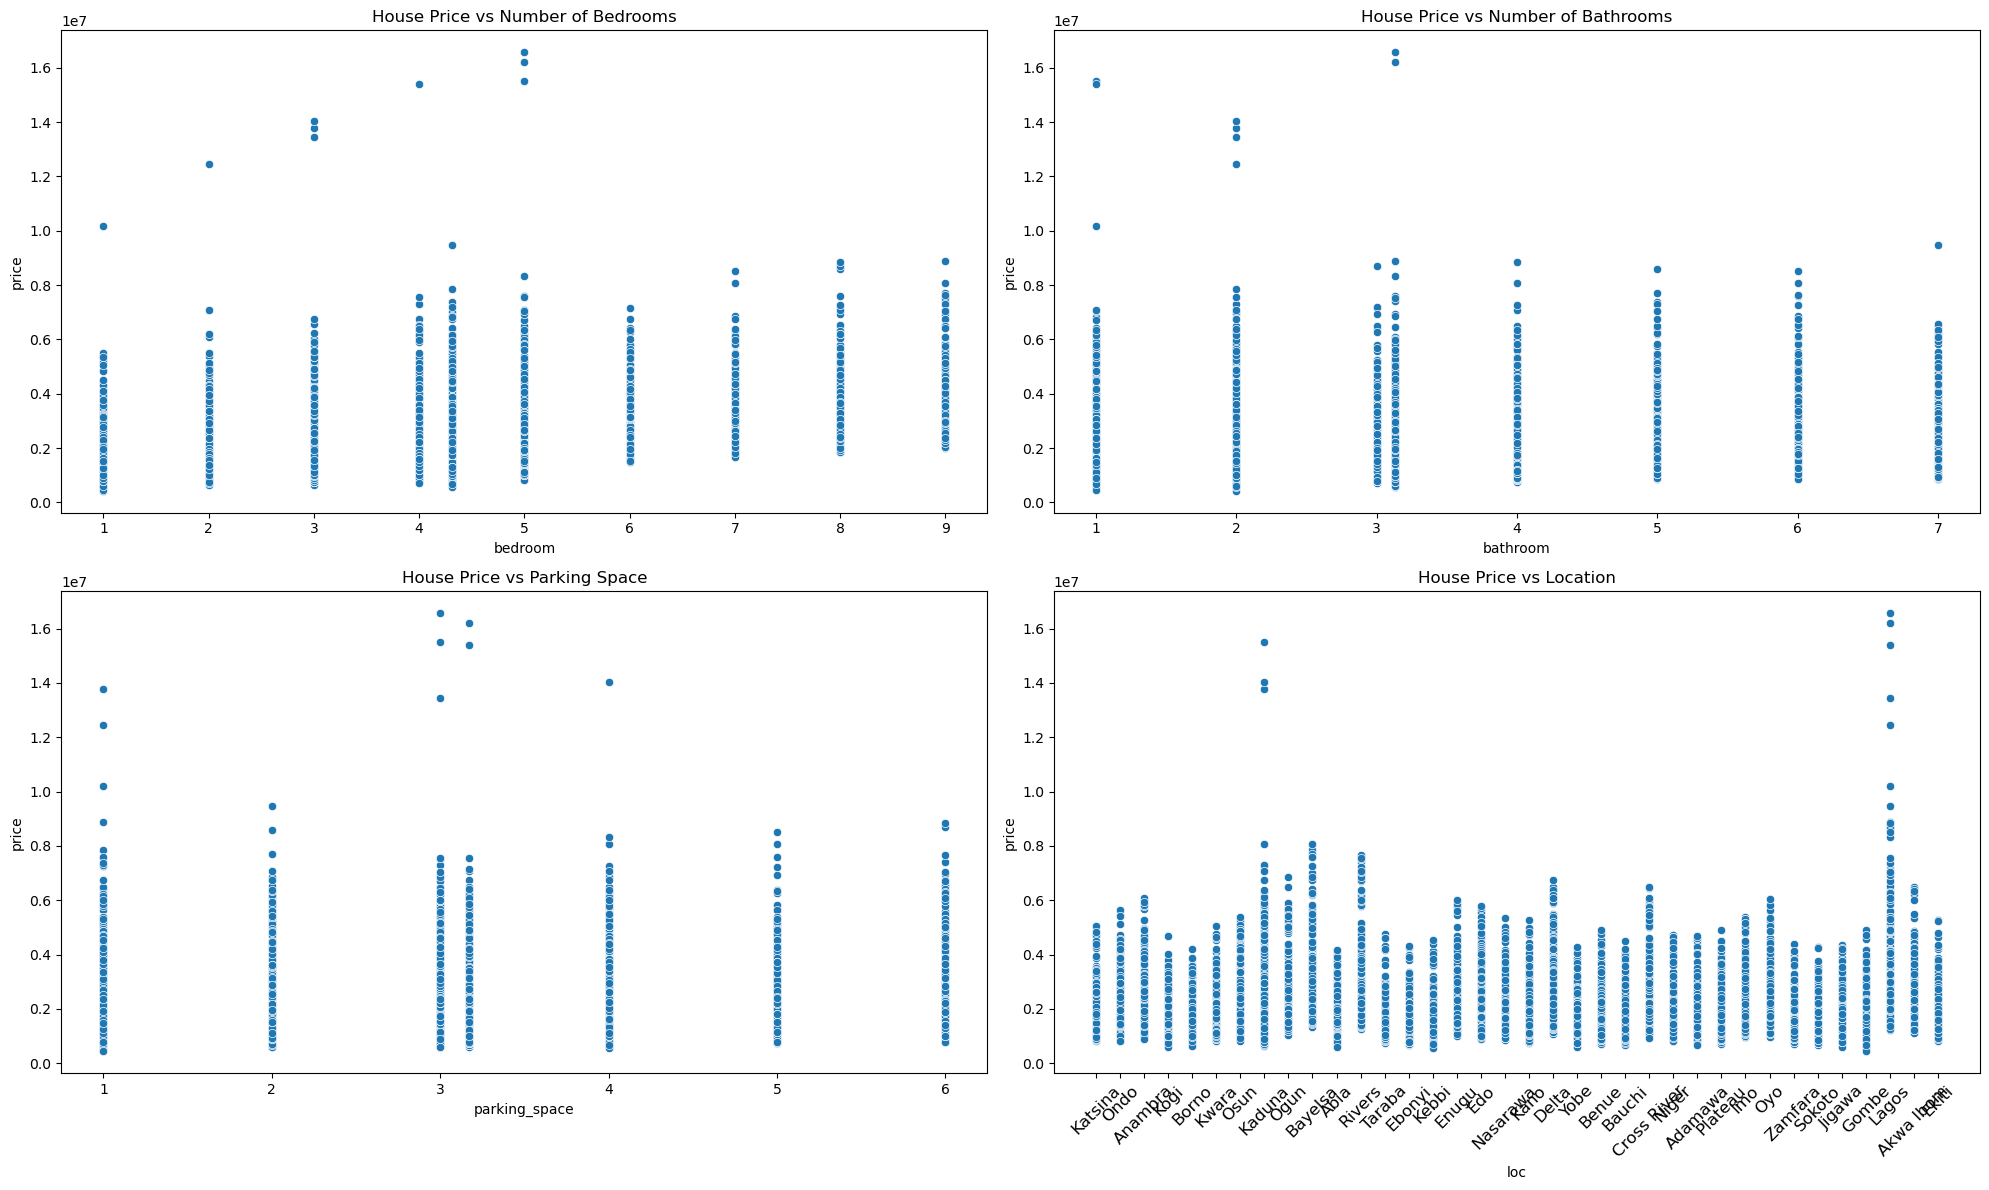

In [21]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.scatterplot(data=df_train, x='bedroom', y= 'price')
plt.title('House Price vs Number of Bedrooms')

plt.subplot(2,2,2)
sns.scatterplot(data=df_train, x='bathroom', y= 'price')
plt.title('House Price vs Number of Bathrooms')

plt.subplot(2,2,3)
sns.scatterplot(data=df_train, x='parking_space', y= 'price')
plt.title('House Price vs Parking Space')

plt.subplot(2,2,4)
sns.scatterplot(data=df_train, x='loc', y= 'price')
plt.title('House Price vs Location')
plt.xticks(rotation=45, fontsize=12)

plt.tight_layout()
plt.show()

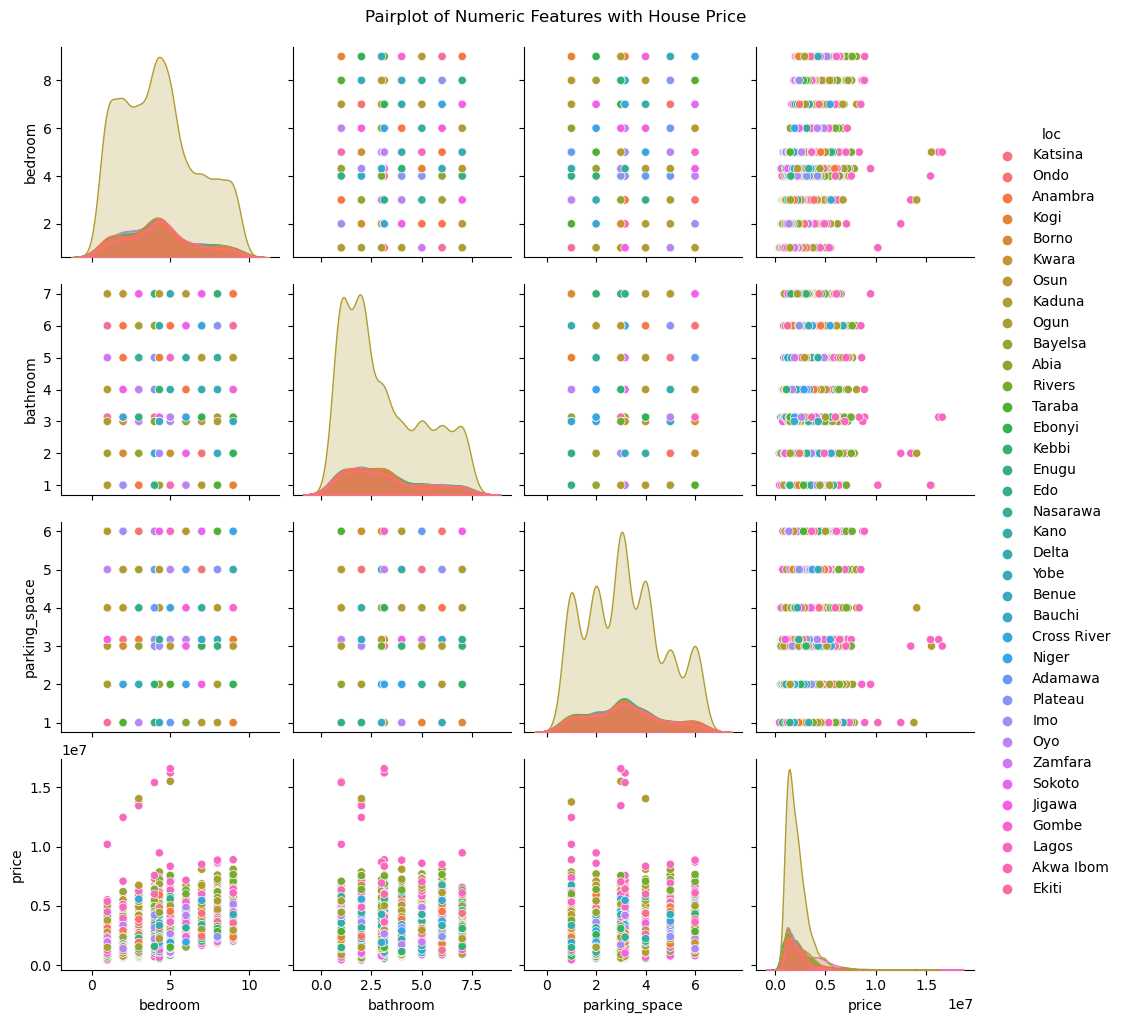

In [22]:
# Multivariate analysis - Pairplot
# Drop the 'ID' column, as it is not needed for the pairplot
df_train = df_train.drop("ID", axis=1)

# Create the pairplot
sns.pairplot(df_train, hue='loc', markers='o', diag_kind='kde')

# Set the title for the pairplot
plt.suptitle('Pairplot of Numeric Features with House Price', y=1.02)

# Display the plot
plt.show()

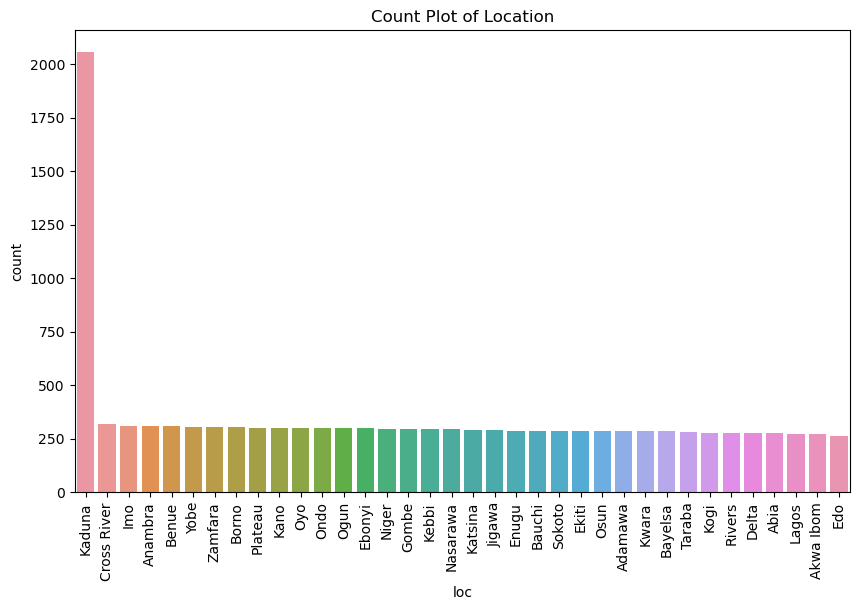

In [23]:
plt.figure(figsize=(10,6))

sns.countplot(x='loc', data=df_train, order=df_train['loc'].value_counts().index)

# Set the title for the count plot
plt.title('Count Plot of Location')

# Rotate the x-axis labels for better visibility if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

### Which state have the higest number of house in the data set?

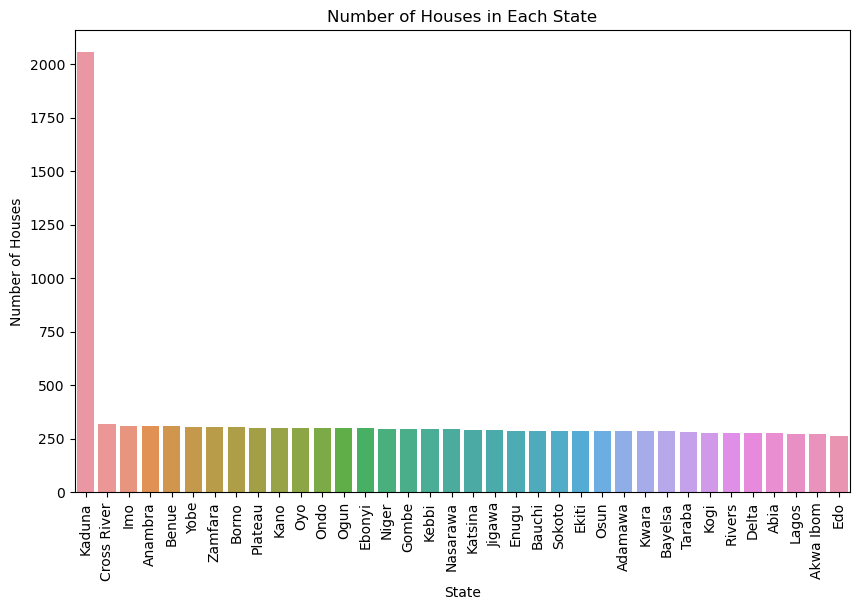

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_train, x='loc', order=df_train['loc'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Number of Houses')
plt.title('Number of Houses in Each State')
plt.show()

### what is the average house price in each state?

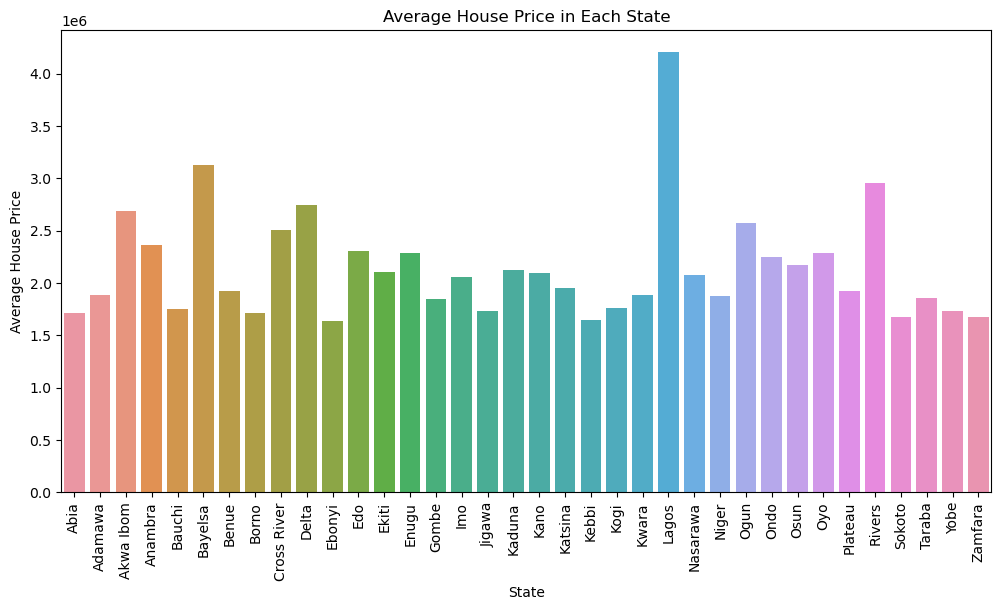

In [25]:
average_price = df_train.groupby('loc')['price'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=average_price, x='loc', y='price', errorbar=None)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average House Price')
plt.title('Average House Price in Each State')

plt.show()

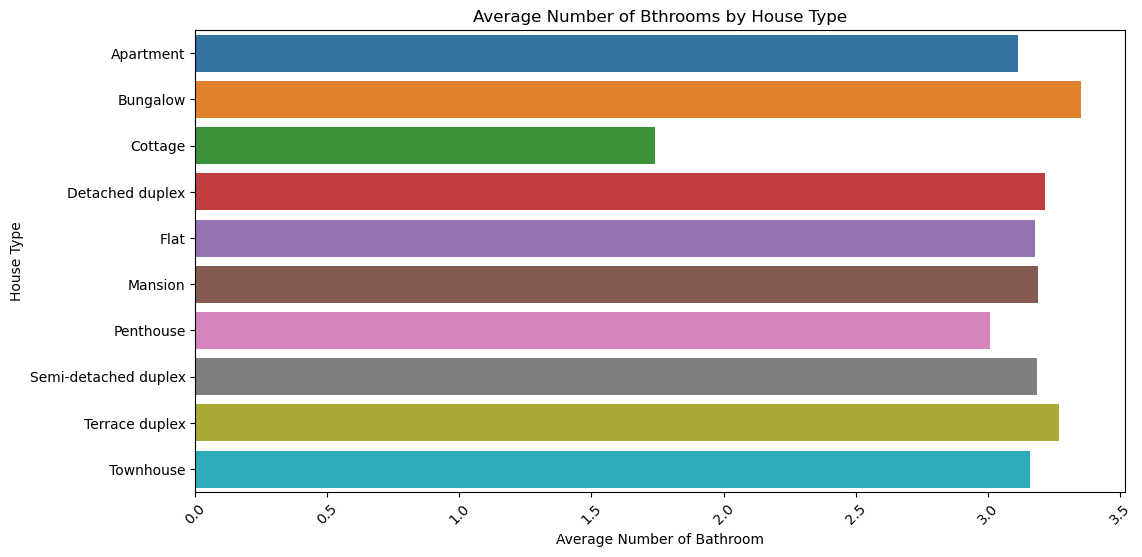

In [24]:
average_bathroom = df_train.groupby('title')['bathroom'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=average_bathroom, x='bathroom', y='title', errorbar=None)
plt.xticks(rotation=45)
plt.xlabel('Average Number of Bathroom')
plt.ylabel('House Type')
plt.title('Average Number of Bathrooms by House Type')

plt.show()

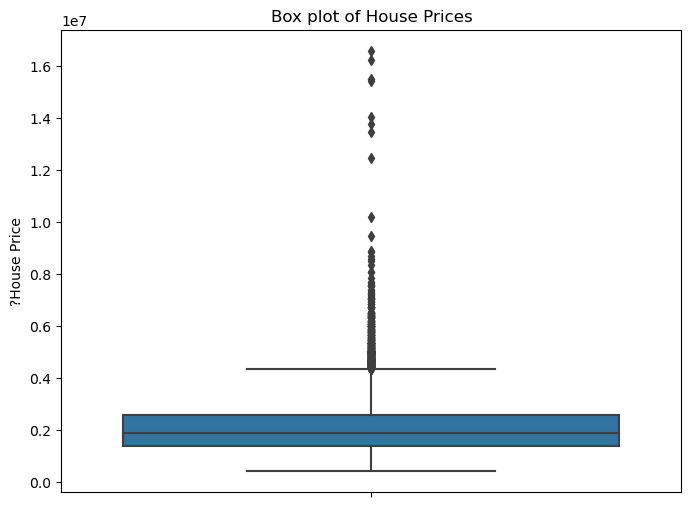

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_train, y='price')
plt.ylabel("?House Price")
plt.title('Box plot of House Prices')
plt.show()

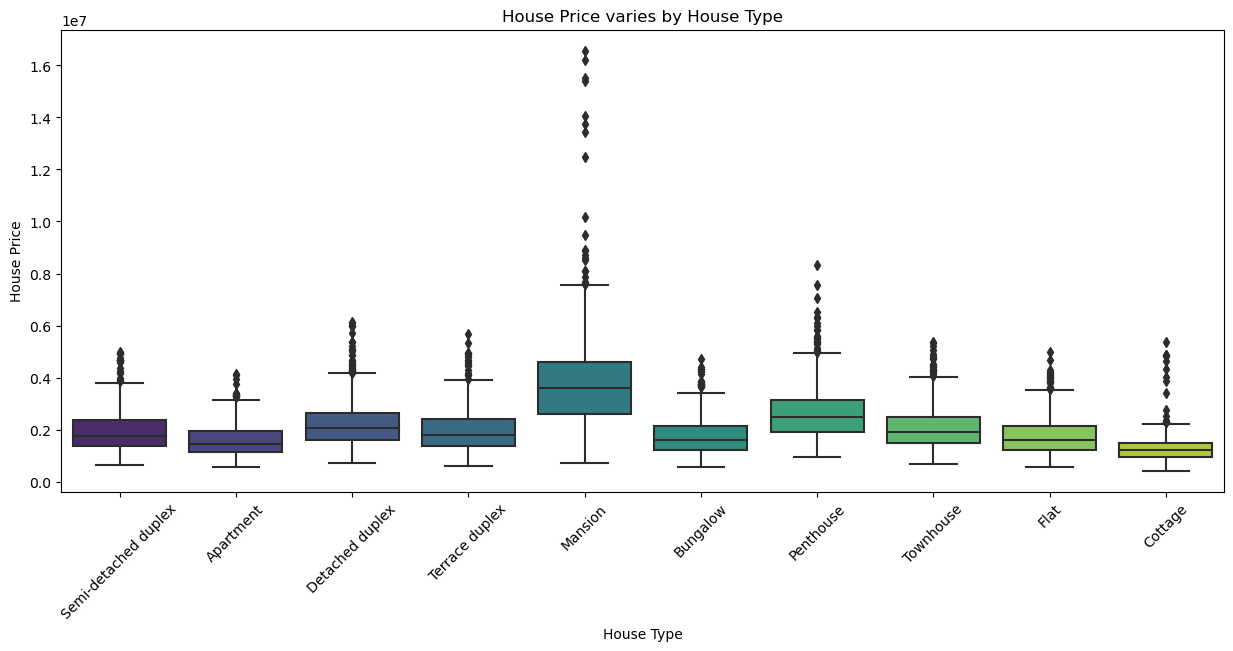

In [26]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df_train, x='title', y='price', palette='viridis')
plt.xlabel('House Type')
plt.ylabel('House Price')
plt.title('House Price varies by House Type')
plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.countplot(x='Category', data=df_train)

# Set the title for the count plot
plt.title('Count Plot of Categories')

# Rotate the x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

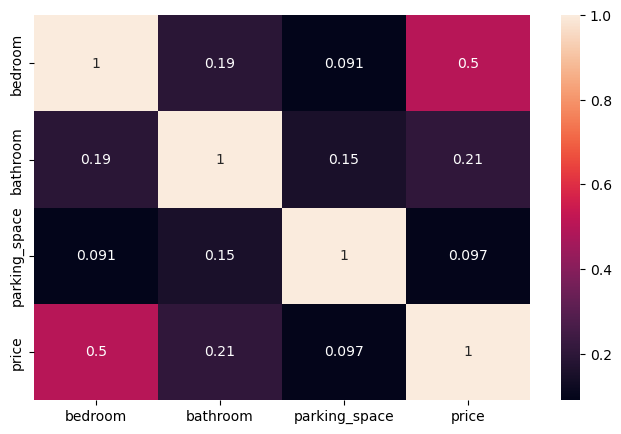

In [27]:
#correlations between the continous features
plt.figure(figsize=(8,5))
corr=df_train.corr()
sns.heatmap(corr, annot=True);